In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime

In [2]:
import pandas_datareader.data as web

In [6]:
start = datetime.datetime(2012,1,1)
end = datetime.datetime(2017,1,1)

In [7]:
tesla = web.DataReader('TSLA', 'yahoo', start, end)
gm = web.DataReader('GM', 'yahoo', start, end)
ford = web.DataReader('F', 'yahoo', start, end)

In [10]:
tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,5.900,5.530,5.788,5.616,4640500,5.616
2012-01-04,5.734,5.500,5.642,5.542,3150500,5.542
2012-01-05,5.586,5.370,5.552,5.424,5027500,5.424
2012-01-06,5.558,5.282,5.440,5.382,4931500,5.382
2012-01-09,5.498,5.224,5.400,5.450,4485000,5.450


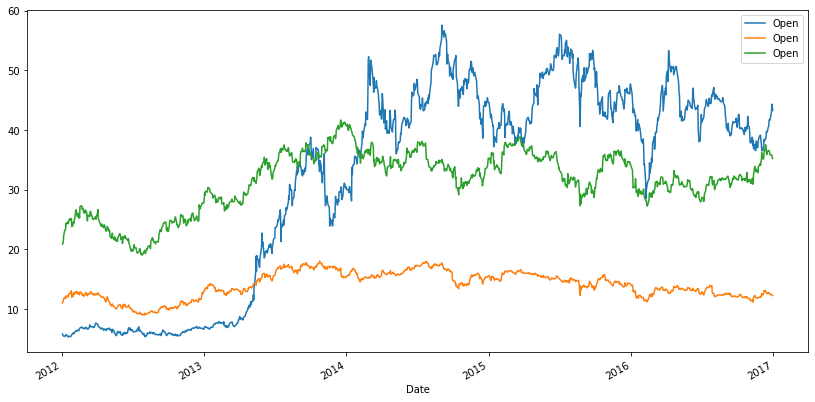

In [19]:
tesla['Open'].plot(figsize = (14,7))
ford['Open'].plot(figsize = (14,7))
gm['Open'].plot(figsize = (14,7))

In [20]:
ford['Volume'].argmax()

493

In [24]:
ford.index[493]

Timestamp('2013-12-18 00:00:00')

In [25]:
ford.index[ford['Volume'].argmax()]

Timestamp('2013-12-18 00:00:00')

In [26]:
tesla['TotalTraded'] = tesla['Volume'] * tesla['Open']
ford['TotalTraded'] = ford['Volume'] * ford['Open']
gm['TotalTraded'] = gm['Volume'] * gm['Open']

<AxesSubplot:xlabel='Date'>

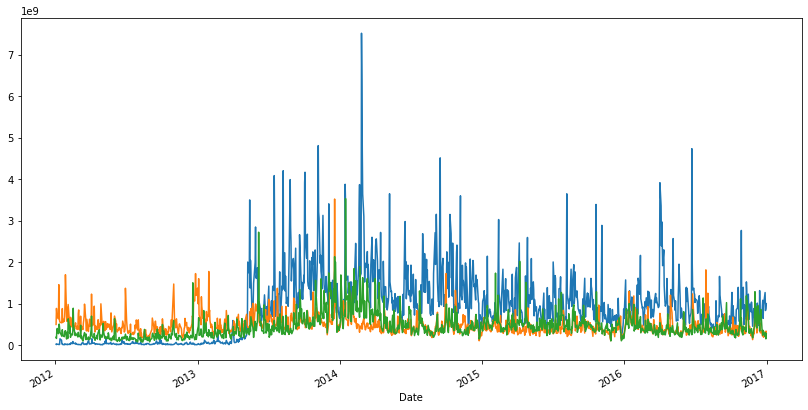

In [28]:
tesla['TotalTraded'].plot(figsize = (14,7), label = 'Tesla')
ford['TotalTraded'].plot(label = 'Ford')
gm['TotalTraded'].plot(label = 'GM')

In [32]:
#Moving Average

<AxesSubplot:xlabel='Date'>

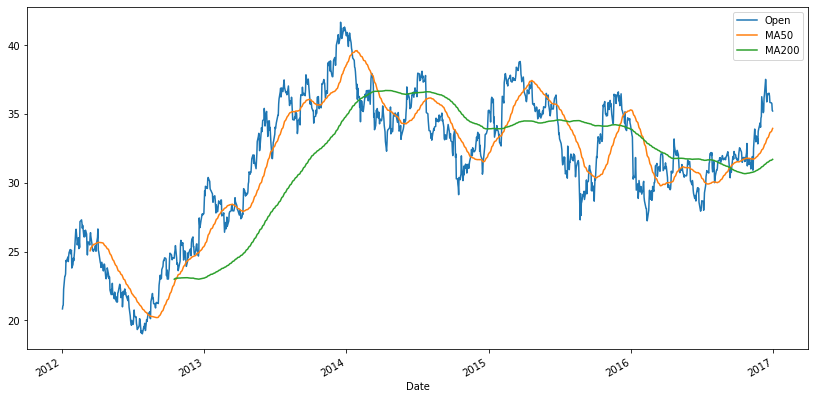

In [35]:
gm['MA50'] = gm['Open'].rolling(50).mean()
gm['MA200'] = gm['Open'].rolling(200).mean()
gm[['Open', 'MA50', 'MA200']].plot(figsize = (14,7))

In [36]:
from pandas.plotting import scatter_matrix

In [42]:
cars = pd.concat([tesla['Open'], ford['Open'], gm['Open']], axis = 1)

In [43]:
cars.columns = ['Tesla', 'Ford', 'GM']

In [44]:
cars.head()

,Tesla,Ford,GM
Date,,,
2012-01-03,5.788,11.00,20.830000
2012-01-04,5.642,11.15,21.049999
2012-01-05,5.552,11.33,21.100000
2012-01-06,5.440,11.74,22.260000
2012-01-09,5.400,11.83,23.200001


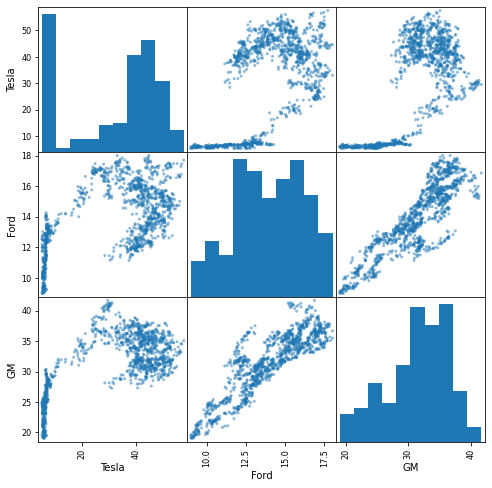

In [46]:
scatter_matrix(cars, figsize = (8,8));

In [ ]:
# ISR *

In [63]:
cars.corr().values

array([[1.        , 0.56904519, 0.67829423],
       [0.56904519, 1.        , 0.86768514],
       [0.67829423, 0.86768514, 1.        ]])

In [58]:
from seaborn import heatmap

<AxesSubplot:>

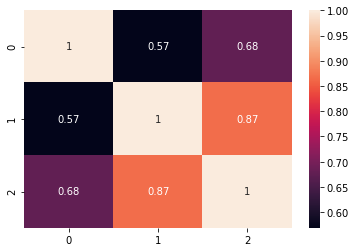

In [60]:
heatmap(cars.corr().values, annot = True)

In [ ]:
# Percentage change

In [68]:
tesla['Returns'] = (tesla['Close'] / tesla['Close'].shift(1)) - 1
tesla['Returns'] = tesla['Close'].pct_change(1)

In [79]:
tesla['Returns'] = tesla['Close'].pct_change(1)
ford['Returns'] = tesla['Close'].pct_change(1)
gm['Returns'] = gm['Close'].pct_change(1)

<AxesSubplot:>

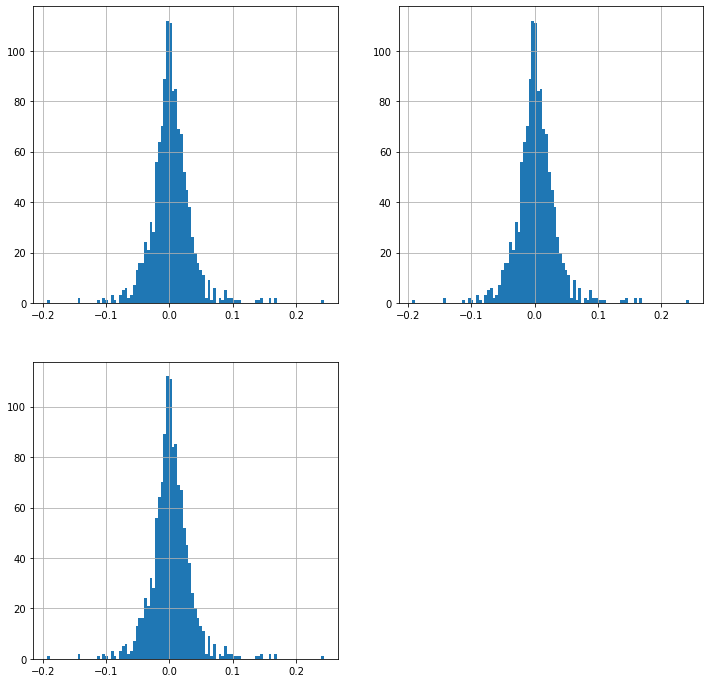

In [80]:
plt.figure(figsize =(12,12))

plt.subplot(2,2,1)
tesla.Returns.hist(bins = 100)

plt.subplot(2,2,2)
ford.Returns.hist(bins = 100)

plt.subplot(2,2,3)
gm.Returns.hist(bins = 100)

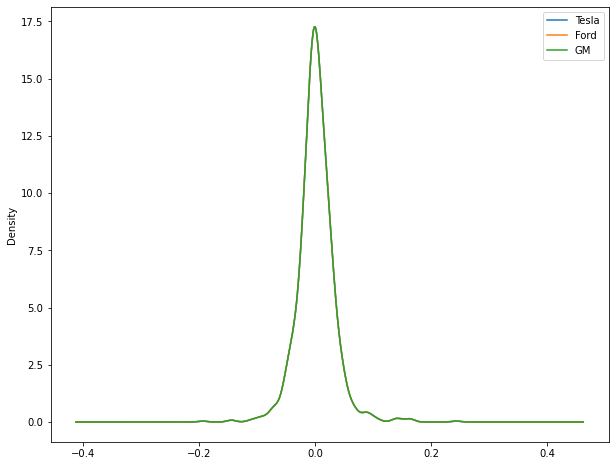

In [84]:
tesla.Returns.plot(kind = 'kde', label = 'Tesla', figsize = (10,8))
ford.Returns.plot(kind = 'kde', label = 'Ford')
gm.Returns.plot(kind = 'kde', label = 'GM')
plt.legend()

In [ ]:
# Compare returns *

In [86]:
box = pd.concat([tesla.Returns, ford.Returns, gm.Returns], axis = 1)
box.columns = ['Tesla', 'Ford', 'GM']

<AxesSubplot:>

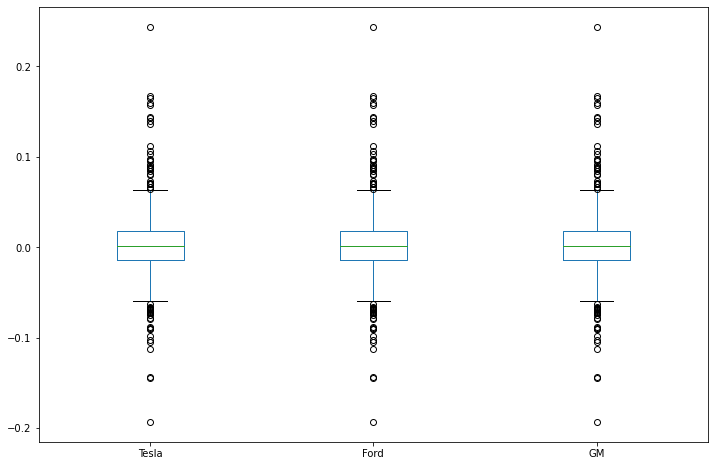

In [89]:
box.plot(kind = 'box', figsize = (12,8))

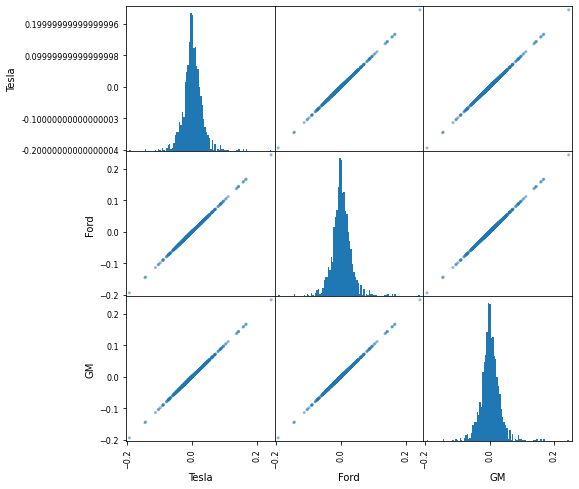

In [91]:
scatter_matrix(box, figsize = (8,8), hist_kwds = {'bins': 100});

In [93]:
tesla['CumReturn'] = (1 + tesla['Returns']).cumprod()
ford['CumReturn'] = (1 + ford['Returns']).cumprod()
gm['CumReturn'] = (1 + gm['Returns']).cumprod()